# Classification

In [3]:
!install.packages('ISLR')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in !install.packages("ISLR"): invalid argument type


**Methods**

1. logistic regression
2. linear discriminant analysis
3. K-nearest neighbors.

In [4]:
library(ISLR)

In [32]:
library(MASS)

In [41]:
library(class)

In [7]:
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [8]:
dim(Smarket)

[1] 1250    9

In [9]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [11]:
cor(Smarket[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


In [12]:
attach(Smarket)

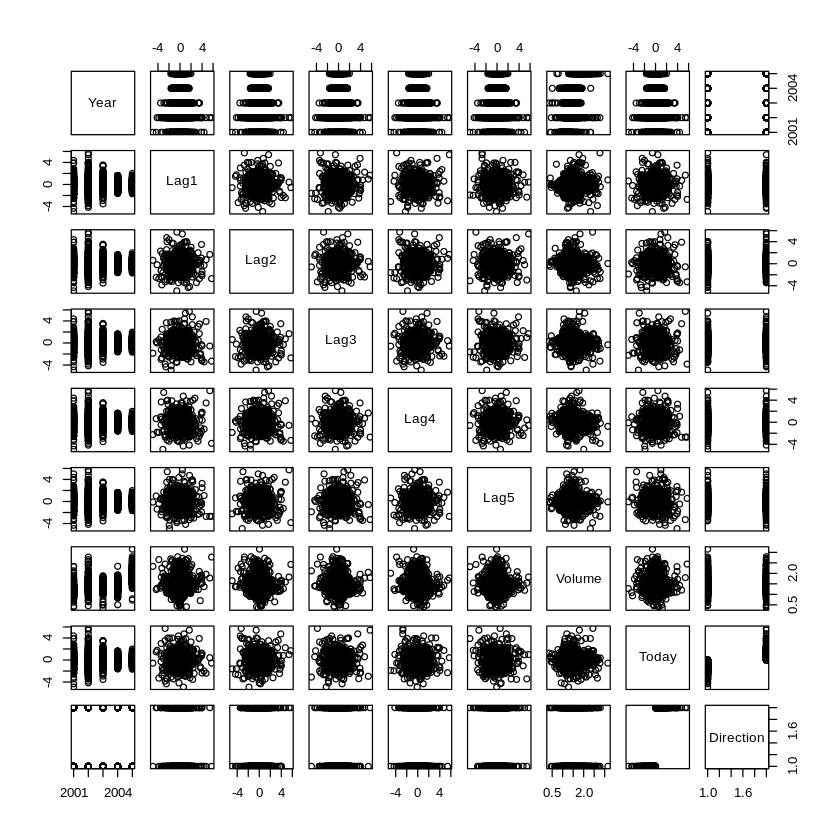

In [13]:
plot(Smarket)

## Logistic Regression

In [16]:
glm.fit=glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data=Smarket, family = binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [18]:
summary(glm.fit)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


In [20]:
glm.probs = predict (glm.fit, type = "response")

In [21]:
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [22]:
contrasts(Direction)

,Up
Down,0
Up,1


In [23]:
glm.pred=rep("Down ", 1250)
glm.pred[glm.probs > .5]="Up"

In [24]:
table(glm.pred, Direction)

        Direction
glm.pred Down  Up
   Down   145 141
   Up     457 507

In [26]:
mean(glm.pred == Direction)

[1] 0.4056

In [27]:
train = (Year < 2005)
Smarket.2005= Smarket[!train,]
dim(Smarket.2005)

[1] 252   9

In [28]:
Direction.2005 = Direction[!train]

In [29]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family = binomial, subset = train )
glm.probs = predict(glm.fit, Smarket.2005, type="response")

In [31]:
glm.pred=rep("Down", 252)
glm.pred[glm.probs > .5]="Up"
table(glm.pred, Direction.2005)
mean(glm.pred == Direction.2005)
mean(glm.pred != Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] 0.4801587

[1] 0.5198413

## Linear discriminant analysis

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

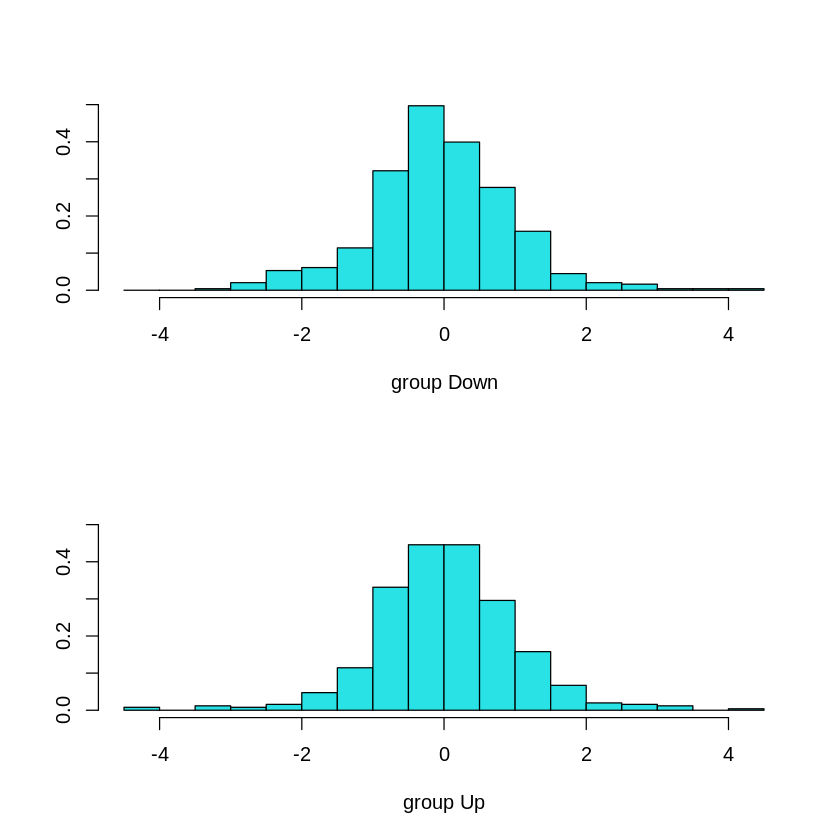

In [34]:
lda.fit = lda(Direction~Lag1+Lag2 ,data=Smarket ,subset = train)
lda.fit
plot(lda.fit)

In [36]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

In [37]:
lda.class =lda.pred$class
table(lda.class, Direction.2005)
mean(lda.class == Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

[1] 0.5595238

In [38]:
sum(lda.pred$posterior [ ,1] >= .5)
sum(lda.pred$posterior [,1] < .5)


[1] 70

[1] 182

## Quadratic Discriminant Analysis

In [39]:
qda.fit = qda(Direction ~ Lag1 + Lag2, data=Smarket, subset = train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [40]:
qda.class = predict(qda.fit, Smarket.2005)$class
table(qda.class, Direction.2005)
mean(qda.class == Direction.2005)


         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

[1] 0.5992063

## K-nearest neighbors

In [42]:
train.X = cbind(Lag1, Lag2)[train,]
test.X = cbind(Lag1 ,Lag2)[!train,]
train.Direction = Direction[train]

In [43]:
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k = 1)
table(knn.pred, Direction.2005)


        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

In [46]:
knn.pred = knn(train.X, test.X, train.Direction, k=3)
table(knn.pred ,Direction.2005)

mean(knn.pred == Direction.2005)


        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

[1] 0.5357143